### Alejandro de Nicolás Gómez

# EXERCICIO DAE - Fast Food Restaurants Across America

## Enunciado da tarefa

Ao longo das anteriores prácticas traballouse con algunhas das diferentes ferramentas e técnicas que proporciona Python para o análise e tratamento de datos. Agora que xa coñeces as ferramentas é o momento de aplicalas para analizar un conxunto de datos.

O proceso de análise exploratorio de datos non é un camiño predefinido no que seguir uns pasos, polo que podes encontrar moitos exemplos diferentes que seguen pasos diferentes. Lembra que o obxectivo do EDA é coñecer mellor os datos, extraer información significativa que nos sirva para outros propósitos (por exemplo, para obter mellores modelos predictivos, entrenamentos mais efectivos, ...).

Algúns dos pasos que nos encontramos nunha análise EDA son:

* Descrición dos datos; significado dos diferentes campos
* Tipos de datos; verificar os tipos dos datos
* Mostrar datos de exemplo
* Cálculo de estatísticos descritivos
* Tratamento de outliers
* Impacto dos valores ausentes
* Gráficas

## Exemplos contidos na páxina de descarga do csv

You can use this data to rank cities with the most and least fast food restaurants across the U.S. E.g.:

    Cities with the most and least McDonald's per capita
    Fast food restaurants per capita for all states
    Fast food restaurants with the most locations nationally
    Major cities with the most and least fast food restaurants per capita
    Small cities with the most fast food restaurants per capita
    States with the most and least fast food restaurants per capita
    The number of fast food restaurants per capita


```
Analyze Country in relation to Date Added
Study the influence of Name on Longitude
```



# EXERCICIO DAE

## Descripción inicial do dataset

 Este dataset é unha lista de 10000 restaurantes de comida rápida sacadas do "Datafiniti's Business Database".

 [Enlace ao dataset](https://www.kaggle.com/yamqwe/fast-food-restaurants-across-americae?select=FastFoodRestaurants.csv)

As columnas que contén son:
* **city:**       cidade onde se atopa o restaurante
* **country:**    pais onde se atopa o restaurante
* **keys:**       
* **latitude**    
* **longitude**   
* **name:**       nome do restaurante
* **postalCode:** código postal do restaurante
* **province:**   estado onde se atopa o restaurante
* **sourceURLs:**
* **websites:**

## Carga de datos

Acceso a colab desde drive

In [1]:
#from google.colab import drive;
#drive.mount('/content/drive')

Imports

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para non ver notación científica en pandas

In [3]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)

Carga do CSV

In [4]:
#fastFood = pd.read_csv("/content/drive/MyDrive/SistemasBigData/Datafiniti_Fast_Food_Restaurants.csv");
fastFood = pd.read_csv("./datasets/Datafiniti_Fast_Food_Restaurants.csv");

## Estudo xeral dos datos

Vemos como está estruturada a táboa de datos

In [5]:
fastFood.shape

(10000, 16)

In [6]:
fastFood.sample(5)

,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
9062,9062,AVwefaDbkufWRAb5Dalf,2016-04-02T05:40:14Z,2018-04-18T14:15:33Z,680 N Main St,Fast Food Restaurants,Mansfield,US,us/oh/mansfield/680nmainst/-891525969,40.778,-82.514,SUBWAY,44902,OH,https://foursquare.com/v/subway/4fa9e065754aec...,"http://www.subway.com,http://subway.com\r"
2161,2161,AVwdmf5-IN2L1WUfxbty,2016-03-12T19:21:34Z,2018-06-17T23:15:55Z,520 E Walton Blvd,Fast Food Restaurant,Pontiac,US,us/mi/pontiac/520ewaltonblvd/-1161002137,42.677,-83.282,McDonald's,48340,MI,https://foursquare.com/v/mcdonalds/4c47b84931e...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
5758,5758,AVwdeP1KkufWRAb56QDl,2015-10-23T01:07:09Z,2018-05-28T16:24:30Z,1409 Broadway,Fried Chicken Joint and Fast Food Restaurant M...,Gary,US,us/in/gary/1409broadway/-1696991095,41.589,-87.337,Church's Chicken,46407,IN,http://www.yellowbook.com/profile/churchs-chic...,"http://churchs.com,http://www.churchs.com\r"
8129,8129,AVwcpOTN_7pvs4fzxZid,2016-05-19T00:47:54Z,2018-05-01T23:12:54Z,8321 200th Ave,Fast Food Restaurants,Bristol,US,us/wi/bristol/8321200thave/-1531774050,42.556,-88.050,Bristol 45 Diner,53104,WI,https://www.yellowpages.com/bristol-wi/mip/bri...,"http://bristol45diner.com,http://www.bristol45..."
1001,1001,AV1dNY2TIxWefVJwe01C,2017-07-19T23:36:16Z,2018-06-22T18:21:07Z,2350 2nd Ave SE,Fast Food Restaurant,Cambridge,US,us/mn/cambridge/23502ndavese/93075755,45.572,-93.195,Arby's,55008,MN,https://www.allmenus.com/mn/cambridge/210849-a...,"http://www.arbys.com,https://locations.arbys.c..."


Vemos con mas detalle as columnas

In [7]:
#Con info, podemos ver que non temos diferencias no número de datos nulos en cada campo
#Tamén vemos que temos 3 columnas numéricas e 13 de tipo texto

fastFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        10000 non-null  int64  
 1   id           10000 non-null  object 
 2   dateAdded    10000 non-null  object 
 3   dateUpdated  10000 non-null  object 
 4   address      10000 non-null  object 
 5   categories   10000 non-null  object 
 6   city         10000 non-null  object 
 7   country      10000 non-null  object 
 8   keys         10000 non-null  object 
 9   latitude     10000 non-null  float64
 10  longitude    10000 non-null  float64
 11  name         10000 non-null  object 
 12  postalCode   10000 non-null  object 
 13  province     10000 non-null  object 
 14  sourceURLs   10000 non-null  object 
 15  websites     10000 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 1.2+ MB


In [8]:
#Con describe, podemos ver os estadísticos descritivos das columnas numéricas

fastFood.describe()

,index,latitude,longitude
count,10000.000,10000.000,10000.000
mean,4999.500,37.337,-93.107
std,2886.896,5.100,15.788
min,0.000,19.504,-159.378
25%,2499.750,33.774,-102.892
50%,4999.500,37.706,-87.951
75%,7499.250,41.141,-81.455
max,9999.000,64.840,-67.463


In [9]:
#Engadindo o include="object", podemos ver estadísticos descritivos das columnas non-numéricas

fastFood.describe(include="object")

,id,dateAdded,dateUpdated,address,categories,city,country,keys,name,postalCode,province,sourceURLs,websites
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9343,8960,7052,9302,324,2764,1,9343,571,5429,50,9338,4136
top,AVwdiX0skufWRAb563Xt,2017-06-19T14:48:37Z,2018-06-19T09:42:27Z,3100 Riverside Dr,Fast Food Restaurant,Houston,US,us/ga/macon/3100riversidedr/93075755,McDonald's,78209,CA,There are too many sourceURLs objects to show....,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,4,6,12,4,3425,107,10000,4,1898,10,1201,6,830


## Correlacións

Podemos ver a correlación das filas numéricas. Neste caso non é moi interesante porque só temos latitude e lonxitude


In [10]:
fastFood.corr()

,index,latitude,longitude
index,1.000,-0.046,0.043
latitude,-0.046,1.000,0.072
longitude,0.043,0.072,1.000


## Cambios nos datos

É posible que poda mellorar a información do dataset cambiando o tipo de algúns datos

In [11]:
#primeiro fago unha copia dos datos con deepcopy, así aseguro que non perdo os iniciais
fastFoodCopy = fastFood.copy(deep=True)

In [12]:
#parece que todos os códigos postais son numéricos, pero algúns teñen información extra
#en formato "#####-####"
#podo probar a cambialos porque parece que non perdería moita información
fastFoodCopy['postalCode'].head(10)

0    70301
1    70301
2    37863
3    37863
4    30260
5    48204
6    48235
7    92056
8    11901
9    79756
Name: postalCode, dtype: object

In [13]:
#paso a int o código postal e me quedo con só os datos nas primeiras 5 posicións
fastFoodCopy['codigoPostal'] = fastFoodCopy['postalCode'].map(lambda x: int(x[:5]))

In [14]:
fastFoodCopy['codigoPostal'].head(10)

0    70301
1    70301
2    37863
3    37863
4    30260
5    48204
6    48235
7    92056
8    11901
9    79756
Name: codigoPostal, dtype: int64

In [15]:
#Como dato curioso, podemos ver que o código postal ten unha correlación moito maior
#con lonxitude que con latitude
fastFoodCopyCorr = fastFoodCopy.corr()
fastFoodCopyCorr['codigoPostal'].sort_values(ascending=False)

codigoPostal    1.000
index          -0.026
latitude       -0.128
longitude      -0.927
Name: codigoPostal, dtype: float64

## Gráficas

Gracias aos cambios feitos no apartado anterior, podemos ver moi ben o mapa dos restaurantes co seu código postal

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

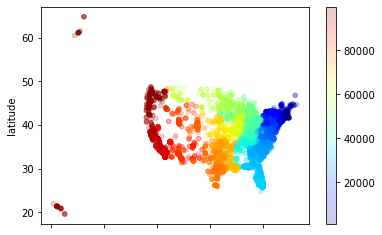

In [16]:
fastFoodCopy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, 
                  c=fastFoodCopy['codigoPostal'], cmap=plt.get_cmap("jet"))

Podemos ver a cantidade de restaurantes en cada estado

In [17]:
fastFoodCopy.sample(5)

,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,codigoPostal
449,449,AV0BTk-fFcQ3k02bDmUF,2017-07-02T03:18:15Z,2018-06-22T18:34:35Z,1108 N Grand Ave,Fast Food Restaurants,Gainesville,US,us/tx/gainesville/1108ngrandave/-390366181,33.636,-97.133,Chicken Express,76240,TX,https://foursquare.com/v/chicken-express/4ce86...,http://www.chickene.com,76240
9998,9998,AVwdl2cykufWRAb57ZPs,2016-04-05T02:59:45Z,2018-04-07T13:19:05Z,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,us/nc/wilson/1702glendaledrsw/-66712705,35.720,-77.946,Pizza Hut,27893,NC,https://www.allmenus.com/nc/wilson/73403-pizza...,http://www.pizzahut.com,27893
5617,5617,AV1iqOs93-Khe5l_OAX7,2017-07-21T01:00:23Z,2018-05-29T00:34:58Z,Hc 84 Box 1938,Fast Food Restaurants,Barbourville,US,us/ky/barbourville/hc84box1938/-791445730,36.853,-83.864,Wendy's,40906,KY,https://www.tripadvisor.com/Restaurant_Review-...,http://www.wendys.com,40906
4528,4528,AVzBAviWLD2H7whiWJkr,2017-06-19T15:40:16Z,2018-05-31T17:38:35Z,4300 Roosevelt Blvd,Fast Food,Philadelphia,US,us/pa/philadelphia/4300rooseveltblvd/-798173377,40.030,-75.105,Charlie's Pizzeria,19124,PA,https://www.trip.com/philadelphia/restaurants/...,http://charlies-pizzeria.com,19124
207,207,AV0Z-6uGLD2H7whiZSdp,2017-07-06T22:18:30Z,2018-06-25T08:56:04Z,2202 N Richmond Rd,Fast Food Restaurants,Wharton,US,us/tx/wharton/2202nrichmondrd/-66712705,29.331,-96.095,Pizza Hut,77488,TX,http://www.yellowbook.com/profile/pizza-hut_15...,http://www.pizzahut.com,77488


<AxesSubplot:xlabel='count', ylabel='province'>

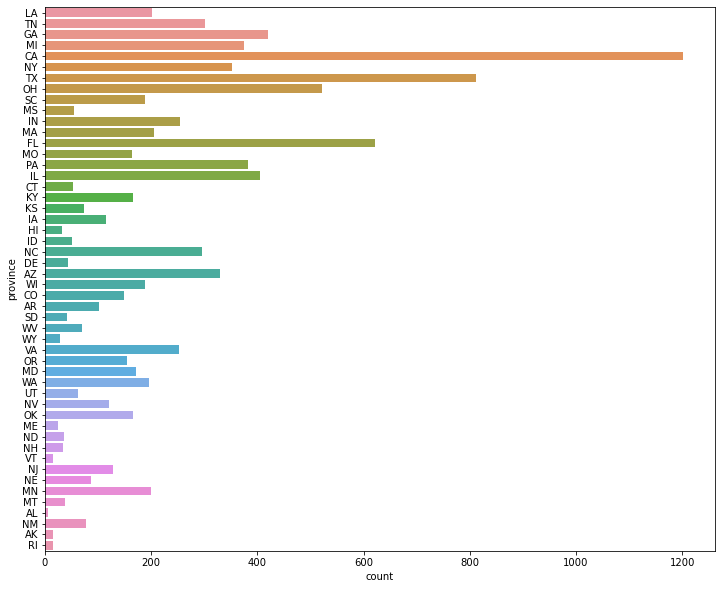

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(data=fastFoodCopy,y='province')

E de forma ordenada

<AxesSubplot:xlabel='count', ylabel='province'>

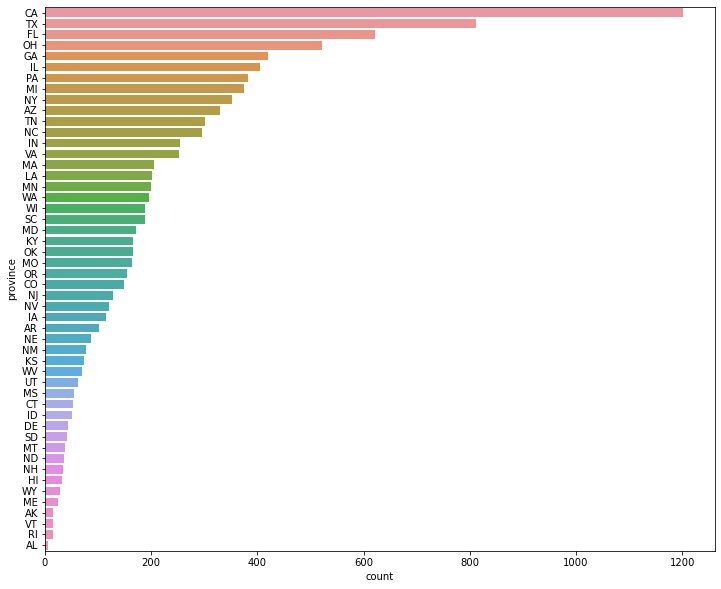

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(y = 'province', data=fastFoodCopy, order=fastFoodCopy['province'].value_counts().index)

**Parece que California é o gañador indiscutible en número de restaurantes de comida rápida**

## Outros datos interesantes

Restaurantes máis comúns

In [20]:
fastFoodCopy['name'].value_counts()

McDonald's                        1898
Taco Bell                         1032
Burger King                        833
Subway                             776
Arby's                             663
                                  ... 
D & M Subs                           1
Tony Wang's Chinese Restaurant       1
Arthur Treacher's Fish & Chips       1
Bistro To Go                         1
Stoko's                              1
Name: name, Length: 571, dtype: int64

**McDonald's, Taco Bell e Burger King son os restaurantes máis comúns**

Punto máis preto de todos os restaurantes en cada rexión

In [21]:
grouped_fastFood = fastFoodCopy.groupby('province')
puntosQuentes = grouped_fastFood['codigoPostal'].mean()
puntosQuentes.sample(5)

province
TN   37630.728
CT    6433.962
NC   27951.295
KS   66876.054
FL   33156.535
Name: codigoPostal, dtype: float64

In [22]:
type(puntosQuentes)

pandas.core.series.Series

In [23]:
puntosQuentesDF = pd.DataFrame(puntosQuentes)
puntosQuentesDF.sample(5)

,codigoPostal
province,
IL,60895.020
ME,4510.920
TN,37630.728
CO,80382.365
IN,46741.350


Provincias con maior e menor número de restaurantes

In [24]:
grouped_fastFood['keys'].count().sort_values(ascending=False).head(5)

province
CA    1201
TX     811
FL     621
OH     522
GA     420
Name: keys, dtype: int64

In [25]:
grouped_fastFood['keys'].count().sort_values(ascending=True).head(5)

province
AL     6
VT    15
RI    15
AK    16
ME    25
Name: keys, dtype: int64

## **Algunhas observacións**

* Podemos ver que aínda que o número de restaurantes no dataset non é moi grande (10000) temos unha cantidade enorme de categorías de restaurante (324) e cidades do país no que están distribuídos (2764)
* Observamos tamén que todos os restaurantes son do mesmo país, polo que esa columna poderíamos borrala sen problema para traballar cos datos en pasos posteriores
* A cantidade pequena de datos numéricos fai máis complicadas as comparacións que poderíamos facer nas columnas

In [26]:
print("Total valores:",fastFoodCopy["id"].count(),"\n")

#valores diferentes en cada columna:
print("categories",fastFoodCopy["categories"].nunique())
print("city",fastFoodCopy["city"].nunique())
print("country",fastFoodCopy["country"].nunique())
print("name",fastFoodCopy["name"].nunique())
print("province",fastFoodCopy["province"].nunique())

Total valores: 10000 

categories 324
city 2764
country 1
name 571
province 50


## Outliers, nulos, repetidos

In [27]:
#Facemos outra copia do dataframe previamente modificado, 
#por se borramos nestos pasos algún dato que máis adiante nos interese manter

fastFoodLimpo = fastFoodCopy.copy(deep=True)

### Nulos

In [28]:
fastFoodLimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         10000 non-null  int64  
 1   id            10000 non-null  object 
 2   dateAdded     10000 non-null  object 
 3   dateUpdated   10000 non-null  object 
 4   address       10000 non-null  object 
 5   categories    10000 non-null  object 
 6   city          10000 non-null  object 
 7   country       10000 non-null  object 
 8   keys          10000 non-null  object 
 9   latitude      10000 non-null  float64
 10  longitude     10000 non-null  float64
 11  name          10000 non-null  object 
 12  postalCode    10000 non-null  object 
 13  province      10000 non-null  object 
 14  sourceURLs    10000 non-null  object 
 15  websites      10000 non-null  object 
 16  codigoPostal  10000 non-null  int64  
dtypes: float64(2), int64(2), object(13)
memory usage: 1.3+ MB


In [29]:
#neste caso non temos datos nulos, pero poderíamos

In [30]:
#borrar as filas que teñan datos nulos
fastFoodLimpo = fastFoodLimpo.dropna()

In [31]:
#borrar as columnas que teñan datos nulos
fastFoodLimpo = fastFoodLimpo.dropna(axis=1)

In [32]:
#engadir un treshold a esos borrados, para só facelos se pasan de "thresh" datos nulos
fastFoodLimpo = fastFoodLimpo.dropna(axis=1, thresh=10)

In [33]:
#engadir "Descoñecido" nos valores nulos (ou 0 nos numéricos)
fastFoodLimpo = fastFoodLimpo.fillna("Descoñecido")

In [34]:
# reemprazo con valores da fila anterior
fastFoodLimpo = fastFoodLimpo.fillna(method='ffill')

In [35]:
# reemprazo don valores da fila posterios
fastFoodLimpo = fastFoodLimpo.fillna(method='bfill')

### Filas Duplicadas

In [36]:
#tampoco temos filas duplicadas
fastFoodLimpo[fastFoodLimpo.duplicated()]

,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,codigoPostal


In [37]:
#as eliminaríamos de esta forma
fastFoodLimpo = fastFoodLimpo.drop_duplicates()

### Outliers

In [38]:
#Neste caso, pode ser posible que non queramos gardar os datos das zonas que estén moi lonxe
#Podemos tratalos como outliers e eliminalos

fastFoodLimpo.describe()

,index,latitude,longitude,codigoPostal
count,10000.000,10000.000,10000.000,10000.000
mean,4999.500,37.337,-93.107,54251.922
std,2886.896,5.100,15.788,28066.036
min,0.000,19.504,-159.378,1001.000
25%,2499.750,33.774,-102.892,30642.750
50%,4999.500,37.706,-87.951,50414.500
75%,7499.250,41.141,-81.455,78840.000
max,9999.000,64.840,-67.463,99709.000


<AxesSubplot:xlabel='latitude'>

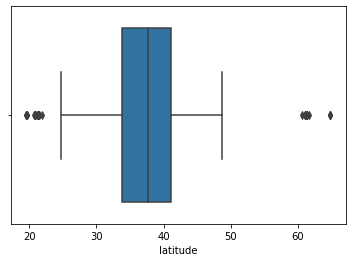

In [39]:
sns.boxplot(data=fastFoodLimpo,x='latitude')

In [40]:
#preparamos os datos
Q1 = fastFoodLimpo.latitude.quantile(0.25)
Q3 = fastFoodLimpo.latitude.quantile(0.75)
IQR = Q3 - Q1

In [41]:
# Cálculo dos "bigotes"
BI = (Q1 - 1.5 * IQR)
BS = (Q3 + 1.5 * IQR)

In [42]:
#Os outliers serán os valores que están fóra do intervalo que definen os bigotes
outliers = fastFoodLimpo[(fastFoodLimpo.latitude < BI) | (fastFoodLimpo.latitude > BS)].sort_values('latitude')

In [43]:
fastFoodLimpo = fastFoodLimpo[(fastFoodLimpo.latitude >= BI) & (fastFoodLimpo.latitude <= BS)].sort_values('latitude')

<AxesSubplot:xlabel='latitude'>

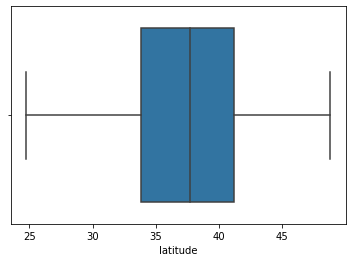

In [44]:
sns.boxplot(data=fastFoodLimpo,x='latitude')

In [45]:
#poderíamos repetir o mesmo para lonxitude, pero neste caso ao eliminar
#os outliers en latitude xa eliminamos os de lonxitude

<AxesSubplot:xlabel='longitude'>

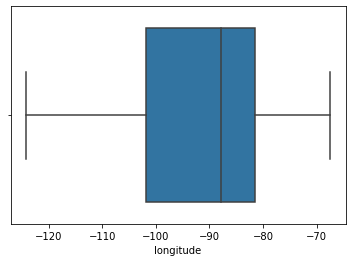

In [46]:
sns.boxplot(data=fastFoodLimpo,x='longitude')

### Resultado do tratamento dos datos

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

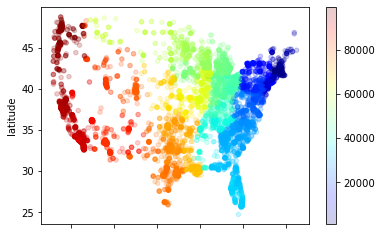

In [47]:
#Xa podemos ver o dataframe cun área de terreno moito máis limitada

fastFoodLimpo.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, 
                  c=fastFoodLimpo['codigoPostal'], cmap=plt.get_cmap("jet"))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

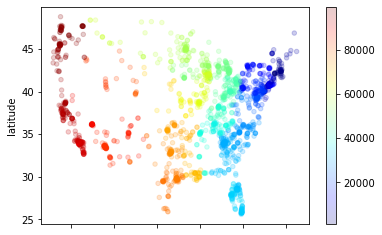

In [48]:
#Poderíamos ver tamén os datos de só os McDonalds

fastFoodMcD = fastFoodLimpo[fastFoodLimpo['name'] == "McDonald's"]
fastFoodMcD.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, 
                  c=fastFoodMcD['codigoPostal'], cmap=plt.get_cmap("jet"))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

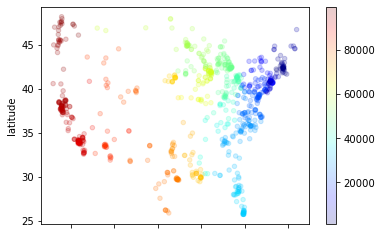

In [49]:
#Poderíamos ver tamén os datos de só os Burger King

fastFoodNoMcD = fastFoodLimpo[fastFoodLimpo['name'] == "Burger King"]
fastFoodNoMcD.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, 
                  c=fastFoodNoMcD['codigoPostal'], cmap=plt.get_cmap("jet"))

**A distribución dos McDonald's e Burger King segue máis ou menos a mesma forma que a xeral dos restaurantes**

## Cambios nas columnas de date

### Traballo coas columnas

Vou comprobar de novo todos os datos, do dataframe xa "limpo", para ver se podo explorar algo máis

In [50]:
#primeiro, fago unha copia do que xa tiña
fastFoodLimpoV2 = fastFoodLimpo.copy(deep=True)

In [51]:
fastFoodLimpoV2.sample(5)

,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,codigoPostal
3810,3810,AVzX6z5bLD2H7whiWxUL,2017-06-24T02:25:37Z,2018-06-03T09:47:10Z,2681 E 120th Ave,Fast Food,Denver,US,us/co/denver/2681e120thave/-791445730,39.914,-104.954,Wendy's,80233,CO,https://foursquare.com/v/wendys/4b8acb2df964a5...,"http://www.wendys.com,http://wendys.com/\r",80233
7380,7380,AVwdGcJHkufWRAb52Tmt,2016-06-20T15:56:35Z,2018-05-13T02:56:55Z,4001 Sunset Dr,"Fast Food Restaurant, American Restaurant, and...",San Angelo,US,us/tx/sanangelo/4001sunsetdr/-345832572,31.428,-100.496,Chick-fil-A,76904,TX,https://www.allmenus.com/tx/san-angelo/179383-...,"http://www.chick-fil-a.com/sunsetmall,http://w...",76904
2827,2827,AVwdGsdskufWRAb52WFJ,2016-05-15T05:33:47Z,2018-06-12T06:31:52Z,3475 Braselton Hwy,Fast Food,Dacula,US,us/ga/dacula/3475braseltonhwy/93075755,34.071,-83.914,Arby's,30019,GA,https://www.yellowpages.com/dacula-ga/mip/arby...,"http://www.arbys.com,http://locations.arbys.co...",30019
2238,2238,AVweDWXmIN2L1WUf1kga,2016-04-01T07:02:20Z,2018-06-16T18:12:05Z,2455 Shawnee Rd,Fast Food Restaurant,Lima,US,us/oh/lima/2455shawneerd/-1161002137,40.705,-84.151,McDonald's,45806,OH,https://foursquare.com/v/mcdonalds/4cf2bced1d1...,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Ye...,45806
5517,5517,AVwdu1mz_7pvs4fz8wJ3,2015-10-20T04:55:37Z,2018-05-29T01:23:46Z,392 N Sam Houston Pkwy E,Fast Food Restaurant North Houston,Houston,US,us/tx/houston/392nsamhoustonpkwye/-1161002137,29.939,-95.398,McDonald's,77060,TX,https://foursquare.com/v/mcdonalds/4bd8944911d...,"http://mcdonalds.com,http://mcdonalds.com/\r",77060


O formato das datas en dateAdded e dateUpdated non me permiten traballar fácilmente. Podo intentar buscar unha forma de cambialos

In [52]:
fastFoodLimpoV2['dateAdded'].sample(5)

4122    2017-06-19T15:28:18Z
9551    2016-06-08T16:04:11Z
4946    2016-01-06T18:24:35Z
3304    2016-06-08T16:17:58Z
5695    2017-02-16T21:49:26Z
Name: dateAdded, dtype: object

In [53]:
fastFoodLimpoV2['dateUpdated'].sample(5)

1962    2018-06-17T23:36:04Z
7193    2018-05-14T06:49:14Z
8810    2018-04-26T01:59:17Z
2818    2018-06-12T06:33:37Z
8975    2018-04-18T14:22:22Z
Name: dateUpdated, dtype: object

Como non teño claro de primeiras como quero facer o traballo de datos, vou probar primeiro con un dato

In [54]:
datoParaLimpar = fastFoodLimpoV2['dateUpdated'][0]
datoParaLimpar

'2018-06-26T03:00:14Z'

In [55]:
datoParaLimpar[:10].replace('-','')

'20180626'

Xa vexo o que quero, fago a limpeza das columnas

In [56]:
fastFoodLimpoV2['dataActualizado'] = fastFoodLimpoV2['dateUpdated'].map(lambda x: x[:10])
fastFoodLimpoV2['dataActualizado'] = pd.to_numeric(fastFoodLimpoV2['dataActualizado'].str.replace('-',''))
fastFoodLimpoV2['dataActualizado']

9174    20180418
6273    20180528
7700    20180509
6277    20180528
7225    20180513
          ...   
3173    20180607
7753    20180509
464     20180622
465     20180622
5722    20180528
Name: dataActualizado, Length: 9952, dtype: int64

In [57]:
fastFoodLimpoV2['dataEngadido'] = fastFoodLimpoV2['dateAdded'].map(lambda x: x[:10])
fastFoodLimpoV2['dataEngadido'] = pd.to_numeric(fastFoodLimpoV2['dataEngadido'].str.replace('-',''))
fastFoodLimpoV2['dataEngadido']

9174    20160421
6273    20170630
7700    20170701
6277    20170619
7225    20170619
          ...   
3173    20161026
7753    20170719
464     20170613
465     20170613
5722    20170719
Name: dataEngadido, Length: 9952, dtype: int64

Como teño unha copia, non teño problema en borrar as columnas orixinais das datas

In [58]:
fastFoodLimpoV2.drop('dateAdded', axis=1, inplace=True)
fastFoodLimpoV2.drop('dateUpdated', axis=1, inplace=True)

### Resultados nos cambios a date

Ao aumentar de novo a cantidade de columnas numéricas, aumenta o xogo que podemos facer de forma fácil cos datos

In [59]:
fastFoodLimpoV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9952 entries, 9174 to 5722
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            9952 non-null   int64  
 1   id               9952 non-null   object 
 2   address          9952 non-null   object 
 3   categories       9952 non-null   object 
 4   city             9952 non-null   object 
 5   country          9952 non-null   object 
 6   keys             9952 non-null   object 
 7   latitude         9952 non-null   float64
 8   longitude        9952 non-null   float64
 9   name             9952 non-null   object 
 10  postalCode       9952 non-null   object 
 11  province         9952 non-null   object 
 12  sourceURLs       9952 non-null   object 
 13  websites         9952 non-null   object 
 14  codigoPostal     9952 non-null   int64  
 15  dataActualizado  9952 non-null   int64  
 16  dataEngadido     9952 non-null   int64  
dtypes: float64(

In [60]:
fastFoodLimpoV2.describe()

,index,latitude,longitude,codigoPostal,dataActualizado,dataEngadido
count,9952.000,9952.000,9952.000,9952.000,9952.000,9952.000
mean,4996.343,37.350,-92.810,54042.295,20180546.391,20160416.147
std,2888.058,4.929,15.233,27970.301,70.657,7672.311
min,0.000,24.729,-124.243,1001.000,20180407.000,20140103.000
25%,2493.750,33.790,-101.862,30604.750,20180512.000,20151109.000
50%,4994.500,37.724,-87.901,50148.000,20180531.000,20160403.000
75%,7502.250,41.137,-81.441,78727.000,20180614.250,20170303.000
max,9999.000,48.784,-67.463,99403.000,20180626.000,20180626.000


**Os datos deste dataset foron engadidos do 2014 ao 2018, e actualizados no 2018**

In [61]:
fastFoodLimpoV2.corr()

,index,latitude,longitude,codigoPostal,dataActualizado,dataEngadido
index,1.000,-0.050,0.049,-0.028,-0.946,0.009
latitude,-0.050,1.000,0.062,-0.131,0.050,0.012
longitude,0.049,0.062,1.000,-0.938,-0.050,0.091
codigoPostal,-0.028,-0.131,-0.938,1.000,0.028,-0.085
dataActualizado,-0.946,0.050,-0.050,0.028,1.000,-0.014
dataEngadido,0.009,0.012,0.091,-0.085,-0.014,1.000


**O índice ten unha correlación moi grande coa data de actualización. Pode que se foran engadindo ao dataset no momento que foron actualizados?**